In [1]:
import matplotlib.pyplot as plt
import numpy as np
import nbimporter
import vanGenuchten as vG
import MoistureConversion as mc

Importing Jupyter notebook from vanGenuchten.ipynb
Importing Jupyter notebook from MoistureConversion.ipynb


### Bentheimer Sandstoneの物性値  
参考：V.Voronina, L. Pel and K. Kopinga: The influence of osmotic pressure on poulticing treatments for heritage objects, Material and Structures, vol.46, pp221-231, 2013  
$\phi_{max}$：空隙率[-]  
$K_{sat}$：飽和透水係数  
$\lambda^{'}_P$：水蒸気圧勾配に対する気相水分伝導率  
$\rho$；材料の密度[kg/m3]  
$C$：比熱[J/(kg・K)]  
$\rho$：水の密度[kg/m3]  
$r$：水の相変化熱量  

物性値を書く際における注意事項  
・物性情報は必ず(tem:温度、moisture：水分状態)からなる関数する。（変数を必要としない場合でも書くこと）  
・

【理想】    
・それぞれの名称を重複することなく一度定義で完結させれること。

水分の情報を定義

In [2]:
class Property():
    
##########################################
###     材料情報の入力        #############
    Phimax = 0.23
    Ksat   = 2.0e-7
    LAMDP  = 2.0E-10
    row  = 1479.25
    C    = 750.0 # J/kg
    
    roww = 1000.0 # kg/m3
    r    = 4.18605E+3

###     van-Genuchten用情報    ##########
    Alfa = 10.0 / 98.0
    n = 2.0
    m = 1.0 - ( 1.0 / n )
    l = 0.5
    
###     水分を表す指標（水分化学ポテンシャル） ###
    def __init__( self, temp, miu ):
        self.proplist = [ 'crow', 'lam', 'phi', 'miu', 'dw', 'dp', 'dphi' ]
        self.temp = temp
        self.miu  = miu
        self.rh   = mc.cal_MiutoRH( temp, miu )
        self.pv   = mc.cal_MiutoPv( temp, miu ) 
        
### 熱物性 ##############################
#   熱容量
    def getCRow( self ):
        return self.row * self.C  
    
#   熱伝導率
    def getLAM( self ):
        return 1.2

#######################################
#   水分物性
#   含水率 from 水分化学ポテンシャル
    def getPhi( self ):
        return vG.Phi( self.Phimax, self.Alfa, self.miu, self.m, self.n )
    
#   水分化学ポテンシャル from 含水率
    def getMiuFromPhi( self, phi ):
        return vG.Miu( self.Phimax, phi, self.Alfa, self.m, self.n )

#   含水率勾配に関する液相水分伝導率
    def getDw( self ):
        return self.Ksat * vG.Kl( self.Alfa ,self.miu ,self.m ,self.n ,self.l )
    
#   水蒸気圧勾配に関する気相水分伝導率
    def getDP( self ):
        Phi = self.getPhi()
        Sl  = Phi / self.Phimax
        return self.LAMDP * ( 1.0 - Sl * 0.9 )
    
#   含水率のポテンシャル微分
    def getDPhi( self ):
        return vG.DPhi( self.Phimax ,self.Alfa , self.miu, self.m, self.n )

In [3]:
# チェック
temp = 293.15
miu = -10.0
m = Property( temp, miu )
m.proplist
print( m.proplist )
print( m.getCRow(), m.getLAM(), m.getPhi(), m.getMiuFromPhi( 0.22 ), m.getDw(), m.getDP(), m.getDPhi() )

['crow', 'lam', 'phi', 'miu', 'dw', 'dp', 'dphi']
1109437.5 1.2 0.16098357394272111 -2.988199933567902 1.3666027427457417e-08 7.401285517526175e-11 0.008211771778347334


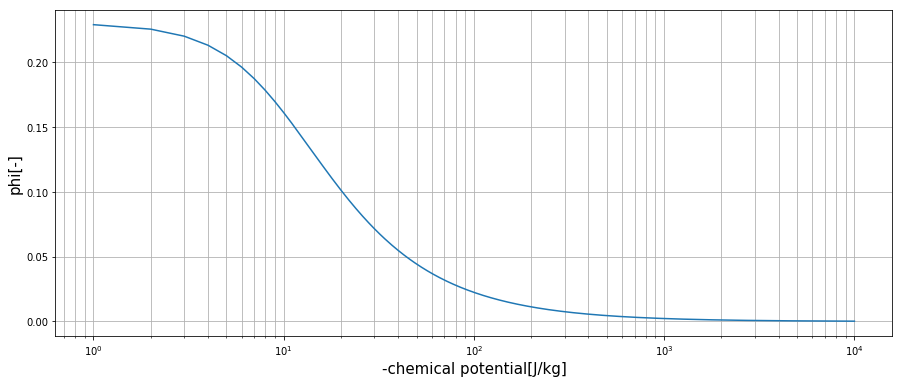

In [4]:
#######################################
###     物性値の確認     ###
###     グラフの描画      ###
plt.figure(figsize = (15.0, 6))
plt.xscale("log")
#plt.yscale("log")
plt.grid(which="both")
plt.xlabel("-chemical potential[J/kg]", fontsize = 15)
plt.ylabel("phi[-]", fontsize = 15)
miu  = np.arange(-10000,0.0,1.0)
temp = 293.15
pro= Property(temp, miu)
phi = pro.getPhi()
plt.plot(-miu,phi)
plt.show()
###########################